# 作業
### 用 digits (dataset.load_digits()) 資料嘗試跑 t-SNE

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, manifold
import matplotlib.patheffects as PathEffects
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context('notebook', font_scale=1.5,
                rc={'lines.linewidth': 2.5})

In [33]:
n_class=10

In [34]:
digits = datasets.load_digits(n_class=n_class)
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

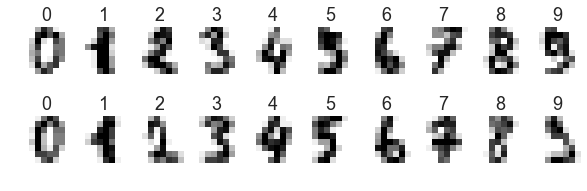

In [35]:
fig, axes = plt.subplots(2, 10, figsize=(10, 3))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(digits.data[i].reshape(8, 8), cmap=plt.cm.binary)
    ax.axis('off')
    ax.set_title(digits.target[i])

In [36]:
data = np.vstack([digits.data[digits.target==i] for i in range(n_class)])
target = np.hstack([digits.target[digits.target==i] for i in range(n_class)])

In [37]:
data_tsne = manifold.TSNE(n_components=2, random_state=0,
                    init='pca', learning_rate=200.,
                    early_exaggeration=12.).fit_transform(data)

In [38]:
def scttrplt(data, n_class, colors):
    # choose a color palette with seaborn
    palette = np.array(sns.color_palette('hls', n_class))
    
    fig = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(data[:, 0], data[:, 1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
    
    txts=[]
    for i in range(n_class):
        xtxt, ytxt = np.median(data[colors==i, :], axis=0)
        txt = ax.text(xtxt, ytxt, str(i), fontsize=24)
        ### what is path effects
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground='w'),
            PathEffects.Normal()
        ])
        txts.append(txt)
    
    return fig, ax, sc, txts

(<Figure size 576x576 with 1 Axes>,
 [Text(1.8554249, 57.375473, '0'),
  Text(24.570522, -16.454132, '1'),
  Text(-40.01889, -27.801424, '2'),
  Text(-46.17137, 9.609807, '3'),
  Text(61.580418, -3.319459, '4'),
  Text(-19.423775, 1.3336809, '5'),
  Text(25.239895, 26.677267, '6'),
  Text(-0.05236595, -51.660866, '7'),
  Text(7.10526, -11.042862, '8'),
  Text(-24.056704, 25.321928, '9')])

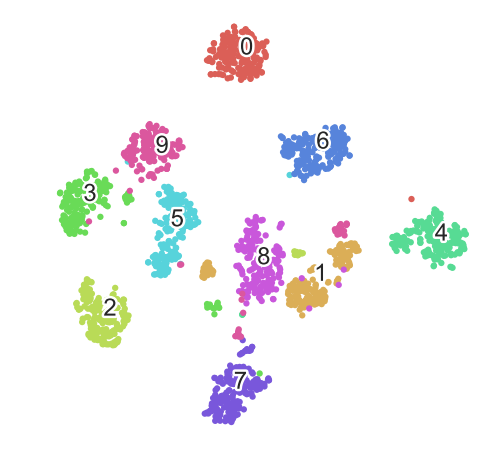

In [39]:
scttrplt(data_tsne, n_class, target)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

def rslt(data, target, gamma='auto'):
    x_train, x_test, y_train, y_test = train_test_split(data, target, stratify=target, random_state=0)
    clf = SVC(gamma='auto')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    con_mat = metrics.confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm=con_mat, 
                          target_names=np.unique(target), 
                          normalize=False)
    return metrics.accuracy_score(y_test, y_pred)

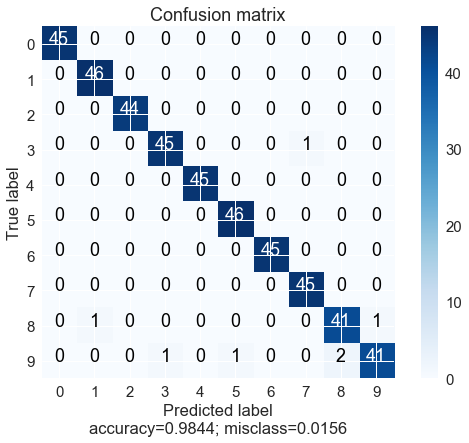

Fitting with t-SNE data, accuracy = 0.9844444444444445


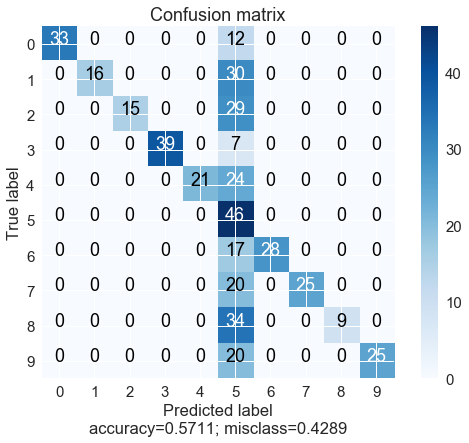

Fitting with original data, accuracy = 0.5711111111111111


In [47]:
print(f'Fitting with t-SNE data, accuracy = {rslt(data_tsne, target)}')
print(f'Fitting with original data, accuracy = {rslt(data, target)}')


In [45]:
def plot_confusion_matrix(cm,
                          target_names, 
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=0)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()